## Regresion logistica (Detectar si es posible tener diabetes segun el BMI)

*Se realiza la importacion de las librerias a utilizar*

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import seaborn as sns

*Se carga la informacion del archivo diabetes.csv y posterior a esto se realiza el formateo de los datos que tomaremos en 'x' y 'y' que en nuestro caso seran BMI y Outcome*

In [30]:
dataset = pd.read_csv('data/diabetes.csv')
x_ = dataset.iloc[:len(dataset), 5].values.reshape(-1,1)
y_ = dataset.iloc[:len(dataset), -1].values

*Realizamos la representacion grafica de los datos para ver como estan distribuidos los datos*

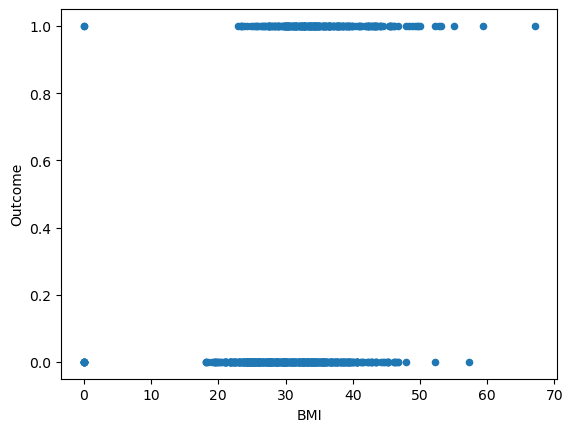

In [31]:
dataset.plot.scatter(x='BMI', y='Outcome')
plt.show()

*Se realizar la division de los datos entre datos de entrenamiento y datos de prueba. Y se realiza la creacion de la regresion logistica y su posterior entrenamiento*

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.3, random_state=0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

*Realizamos las predicciones con base a los datos de pruebas, y validamos la data de que tan preciso es el modelo*

In [33]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[141  16]
 [ 56  18]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       157
           1       0.53      0.24      0.33        74

    accuracy                           0.69       231
   macro avg       0.62      0.57      0.56       231
weighted avg       0.66      0.69      0.65       231



*Dibujamos como se veria de manera grafica la matriz de confusion con las predicciones de nuestro modelo*

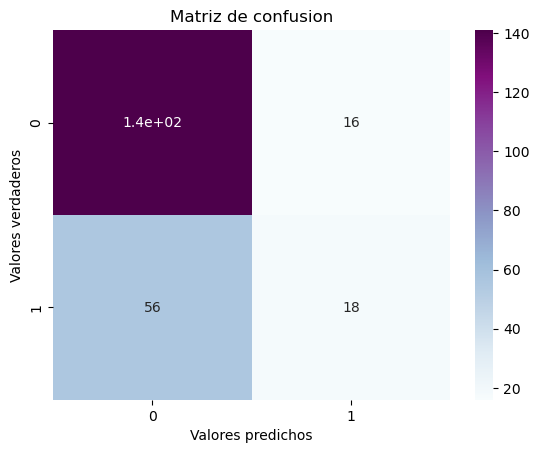

In [34]:
sns.heatmap(cm, annot=True, cmap="BuPu")
plt.xlabel('Valores predichos')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de confusion')
plt.show()

*Realizamos la grafica de la curva ROC la cual nos indica que tan bueno es nuestro modelo de regresion logistica*

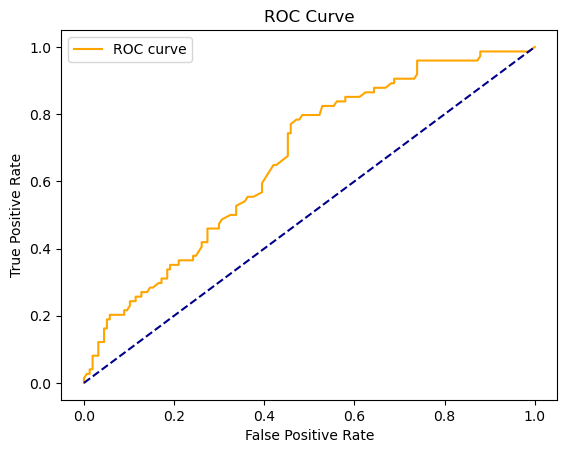

In [35]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
